<a href="https://colab.research.google.com/github/segrelab/learn-fba/blob/main/FBA_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Flux Balance Analysis (FBA) Tutorial**

This notebook is meant to introduce FBA in a simple but biologically meaningful way. It is associated with the manuscript *Metabolic flux modeling in marine ecosystems*, by Helen Scott and Daniel Segrè.

##Table of contents
1. Summary of basic hypotheses underlying FBA, and standard formulation
2. List of useful references and online resources
3. Super-simple example of stoichiometric model (3 reactions)
4. Simple, biologically meaningful toy model, unsolvable by intuition

##Libraries Used

Import essential libraries, including basic numerical and graphics library and scipy optimization library.

numpy, seaborn, matplotlib, scipy, cobrapy, time


In [2]:
import numpy as np # Imports Python numerical library
import seaborn as sns # Imports Library for drawing heatmaps
import matplotlib.pyplot as plt # Import Library for plotting graphs
from scipy.optimize import linprog # Imports Linear Programming function
from scipy.optimize import linprog_verbose_callback # Imports Linear Programming function
from IPython.display import IFrame # Imports HTML element loader

## 1. Summary of basic formulation of FBA

Consider a metabolic network composed of $n$ reactions and $m$ metabolites. The network can be represented by a stoichiometric matrix $\bf{S}$ whose element
$S_{ij}$
represent the moles of metabolite $i$ participating in reaction $j$. Note that $S_{ij}>0$ if metabolite $i$ is a product, $S_{ij}<0$ if metabolite $i$ is a reactant.

Given a vector of fluxes $V = (V_1,V_2,...V_n)$ (whose units are $mmol\cdot grDW^{-1} \cdot h^{-1}$), the steady state equation for the system can be written as


$$
\mathbf{S}V=0
$$


The above equation defines linear constraints between the fluxes. In addition, inequality constraints (lower bounds, LB; and upper bounds UB) can be set for each fluxes:


$$
LB_j \leq V_j \leq UB_j
$$

Within the space of possible states defined by the equality and inequality constraints, one can search for a state that maximizes a given objective function. The objective function can be defined through a set of coefficients

$$
c = (c_1,c_2,...,c_n)
$$

such that the objective function to be maximized is defined as

$$
Z = \sum_{j=1}^{n} c_j V_j = c \cdot V
$$


The FBA problem is then formulated as follows:

$$
\begin{align}
\max \quad & Z = c \cdot V \\
\text{subject to} \quad & \mathbf{S}V=0 \\
& LB_j \leq V_j \leq UB_j \quad \forall j
\end{align}
$$


This optimization problem can be solved using linear programming (LP).


##2. List of useful references and online resources

**Early concept of stoichiometric modeling:**
Papoutsakis ET., Equations and calculations for fermentations of butyric acid bacteria. Biotechnol Bioeng. 1984 Feb;26(2):174-87. https://onlinelibrary.wiley.com/doi/10.1002/bit.260260210

**First paper with current formulation:**
Varma and Palsson, Metabolic Flux Balancing: Basic Concepts, Scientific and Practical Use, Nature Biotech 1994, https://www.nature.com/articles/nbt1094-994

**A useful didactic paper:**
Rawls et al., A simplified metabolic network reconstruction to promote understanding and development of flux balance analysis tools, Comput Biol Med
. 2019 Feb;105:64-71. https://pubmed.ncbi.nlm.nih.gov/30584952/

**COBRA toolbox for Matlab:**
Becker et al.,  Quantitative prediction of cellular metabolism with constraint-based models: the COBRA Toolbox, Nat Protoc 2007;2(3):727-38. https://www.nature.com/articles/nprot.2007.99

**Testing of FBA and exploration of suboptimal space:**
Segrè et al., Analysis of optimality in natural and perturbed metabolic networks, PNAS 2020. https://www.pnas.org/content/99/23/15112.long




## 3. Super-simple example

To form an intuitive understanding of the mathematical process of FBA, we will use ultra-simple example of a metabolic network, with just three reactions.
that combines carbon and nitrogen into cellular biomass, called the

*   $v_C$: Imports 1 carbon from the environment into the cell
*   $v_N$: Imports 1 nitrogen from the environment into the cell
*   $v_b$ (the biomass reaction): combines 10 carbons and 1 nitrogen to make a new unit of biomass, which is removed from the cell.

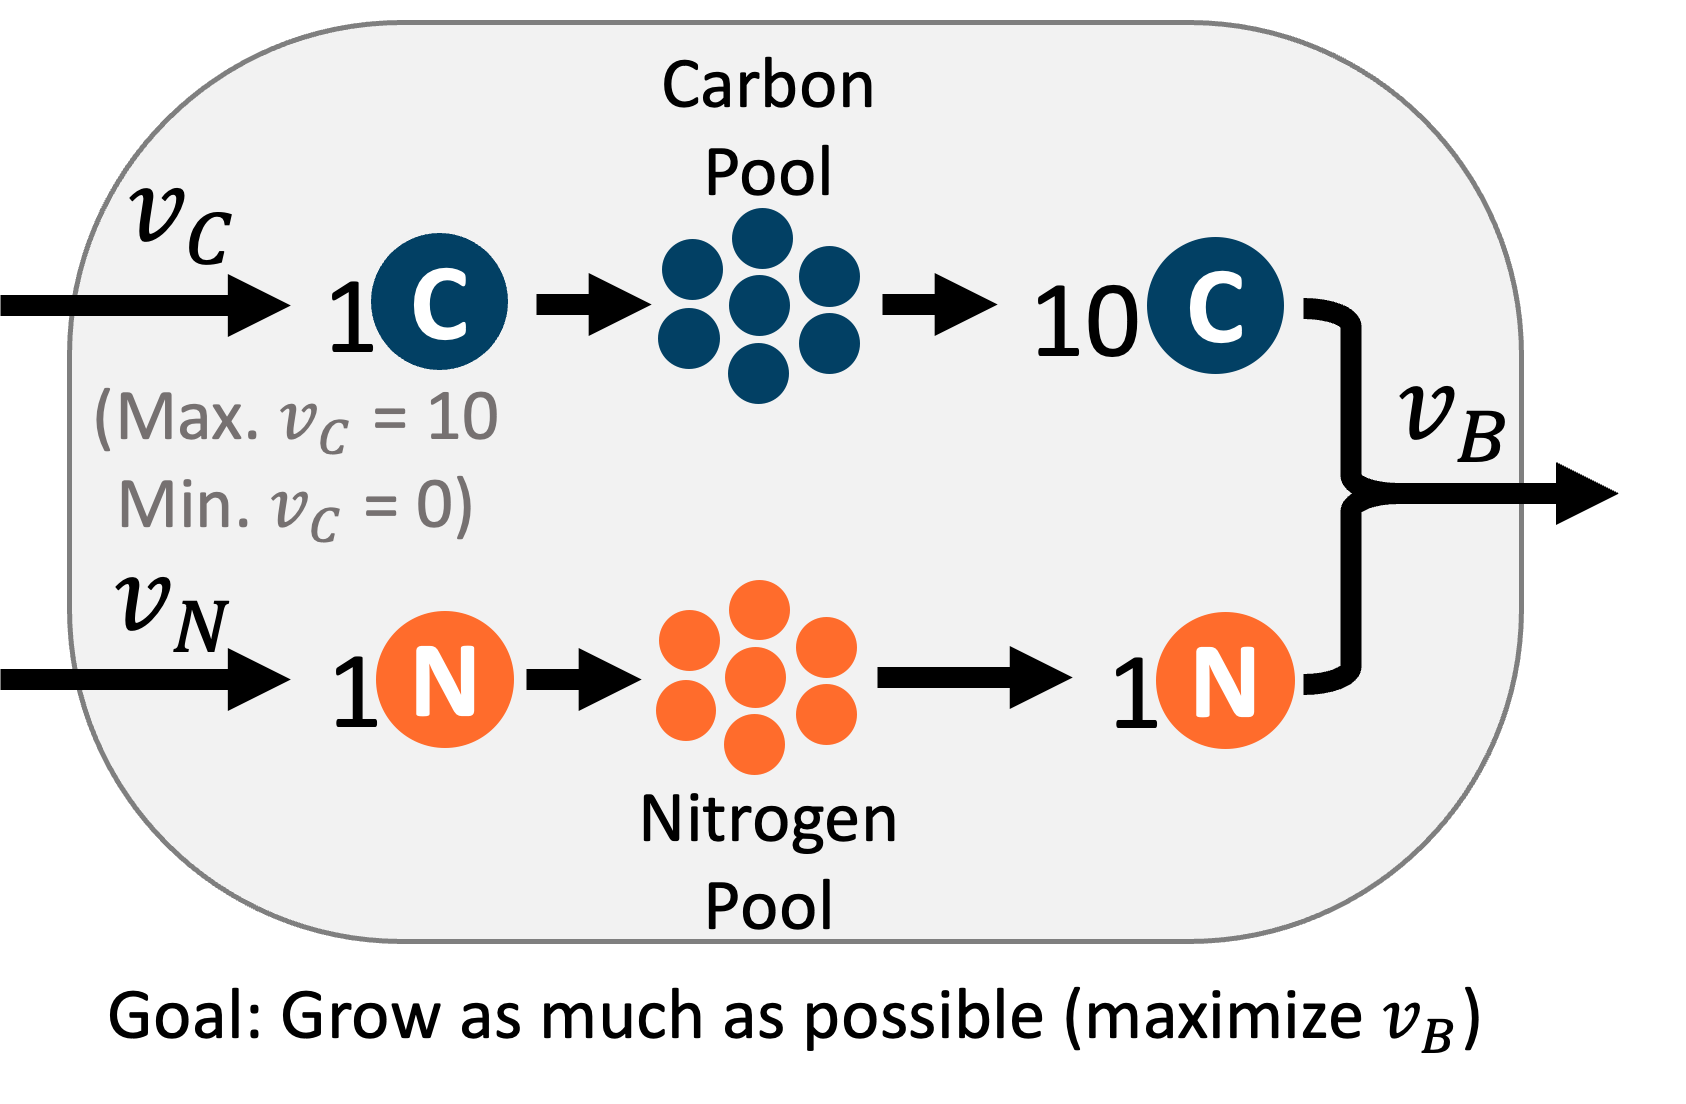

## Solve FBA graphically

This ultra-simplified metabolic network allows us to visualize the process of FBA graphically, because there are only three reactions, each of which will be an axis on our graph. An interactive graph is shown below where $v_c$ corresponds to the x axis, $v_n$ corresponds to the y axis, and $v_b$ corresponds to the z axis.

The first key assumption of FBA is that the cell is in a "steady state", where the metabolites in the cell (carbon and nitrogen) do not change in concentration. To be in steady state requires that the flux into a certain metabolite must be equal to the flux out of the metabolite. You can use mass balance equations to represent this requirement. In our example, there are two mass balance equations, one over carbon and the other over nitrogen. Each asserts that the uptake flux of the metabolite is equal to the flux of the biomass reaction times the stoichiometric coefficient of the metabolite in the biomass reaction.

$v_C = 10v_B$

$v_N = v_B$

These mass-balance equations can be represented graphically as planes. Any location on a plane represents a combination of reaction fluxes that satisfies that mass balance equation.

To see the planes in the following interactive graph, make sure that the first two equations are toggled on, by clicking the circle to the left of the equation.

For the entire reaction network to be in a steady state, all of the mass balance constraints must be satisfied. In this example, all mass balance constraints are satisfied at the intersection of the two planes, which forms a single line. This means that any point along this line is a possible combination of fluxes that satisfies the steady state constraint.

The feasible space line is plotted below in purple in equation 3.

To narrow down this feasible space, we can set bounds of the reaction fluxes, so that the value is constrained to a window defined by an upper and lower bound. For our example, we know that the carbon uptake reaction (Vc) must be between the values of 0 and 10. A lower bound of 0 represents that the reaction cannot flow in reverse (and release carbon). An upper bound of 10 may indicate that there are only 10 mmol of carbon in the environment, or that the transporters for carbon are only capable of importing that much per unit time. We can use these inequalities to shorten our feasible space to a line segment, but it still may contain many possible solutions.

The bounds on vc are shown below in the inequality in equation 4, which plots a rectangular space where the vc values are valid.

To find the new smaller feasible space would require plotting the intersection of the rectangular space, with the two steady state planes. Here you can imagine, cutting off the feasible space.

To pick a single solution within this new smaller feasible space, we will also require a second assumption about the cell- that the cell has some sort of objective to its metabolism. Most commonly, we assume that a cell will maximize its growth, but it could also maximize the production of a high-value metabolite, such as ATP, or may minimize its energy usage. In the case of our simple cell, we can say that the objective of the cell is to grow as much as possible, or maximize the flux through the biomass reaction. So we must find the point in the feasible space where the value of vb is the highest. On our constrained feasible space, the highest flux for vb is 1, which is achieved when vc equals 10 and vn equals 1.


In [3]:
# @title
# Display interactive graph of FBA constraints and solution
# Note: May need to change width/height settings for best display on different monitors
# To interact with the graph on the desmos website, follow the link in the following line of code
IFrame(src="https://www.desmos.com/3d/a080fb997e", width=700, height=375)

##Define reaction network

Define reaction network, i.e. stoichiometric matrix and labels of metabolites and reactions

In [ ]:
# Labels of reactions
reacs = ['vc', 'vn', 'vb']
# Labels of the metabolites
metabs = ['c', 'n']

# Define the stoichiometric matrix
# Each column corresponds to the reactions in the order they appear in `reacs`
# and each row correspond to the metabolites in the order they appear in `metabs`
S = np.array([[  1.,   0.,   -10.],
              [  0.,   1.,   -1]])

STOICHIOMETRIC MATRIX


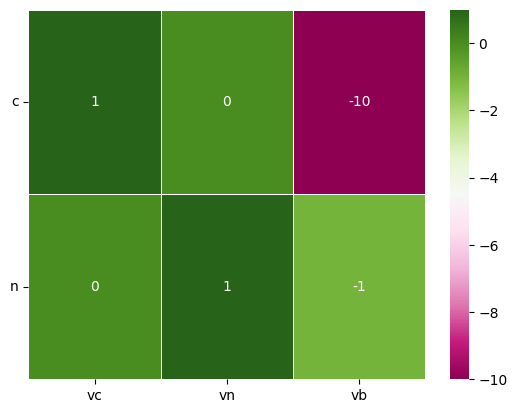

In [ ]:
# Visualize the S Matrix
print("STOICHIOMETRIC MATRIX")
colormap = sns.color_palette("Greens")
sns.heatmap(S, annot=True,  linewidths=.5, xticklabels=reacs, yticklabels=metabs, cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

## Define optimization parameters

Define optimization parameters, i.e. flux lower bounds (LB) and upper bounds (UB), and objective function

---




In [ ]:
# Get the number of reactions and metabolites
m = len(metabs)
n = len(reacs)

b=np.zeros(m) # Right-hand side of SV=0

In [ ]:
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB = np.zeros(n) # Set of lower bounds, initialize to zero # FIXME: Change to np.zeros
UB = LARGE*np.ones(n) # Set of upper bounds, initialize to LARGE

# Change flow through individual reaction
UB[reacs.index('vc')] = 10

LBUB = np.transpose(np.stack((LB,UB), axis=0)) # Combine LB, UB into set of pairs [LB,UB]

In [ ]:
obj = np.zeros(n) # Initialize Objective function vector to zero
obj[reacs.index('vb')] = -1 # Define objective function. Default of optimizer is "minimize", so a -1 will lead to maximization

## Run LP to solve FBA

Perform Linear Programming (LP) calculation to solve FBA

In [ ]:
print("IMPLEMENT OPTIMIZATION:")
options = {"disp": False}
# Call linprog function to solve LP problem
solution = linprog(c=obj, A_eq=S, b_eq=b, bounds=LBUB, options=options) # max c*v, given Sv=b, LB < v <UB
#print(solution)
# A_eq*v=b_eq --> SV=0

print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)

IMPLEMENT OPTIMIZATION:
Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties):  0
Optimal value:  -1.0
Solution vector:  [10.  1.  1.]


## Display solution

Visualize Solution vector

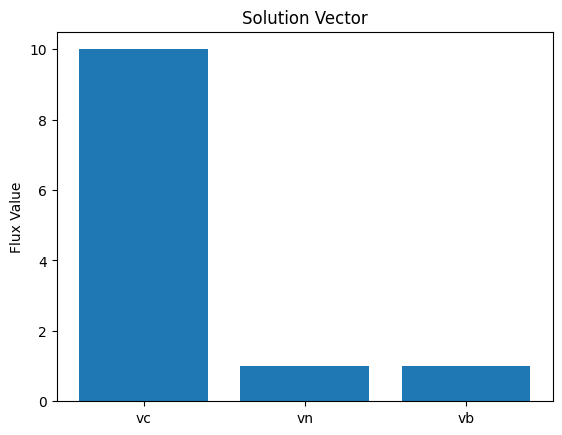

In [ ]:
v_pos = np.arange(n)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, reacs)
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()

## 4. FBA from scratch, slightly less trivial example

This is a slightly more realistic network, capturing some key features of a real core metabolic network, with energy generation (both fermentation and respiration), biomass production and non-growth-associated maintenance. (Model made up by Daniel Segrè for teaching purpose)

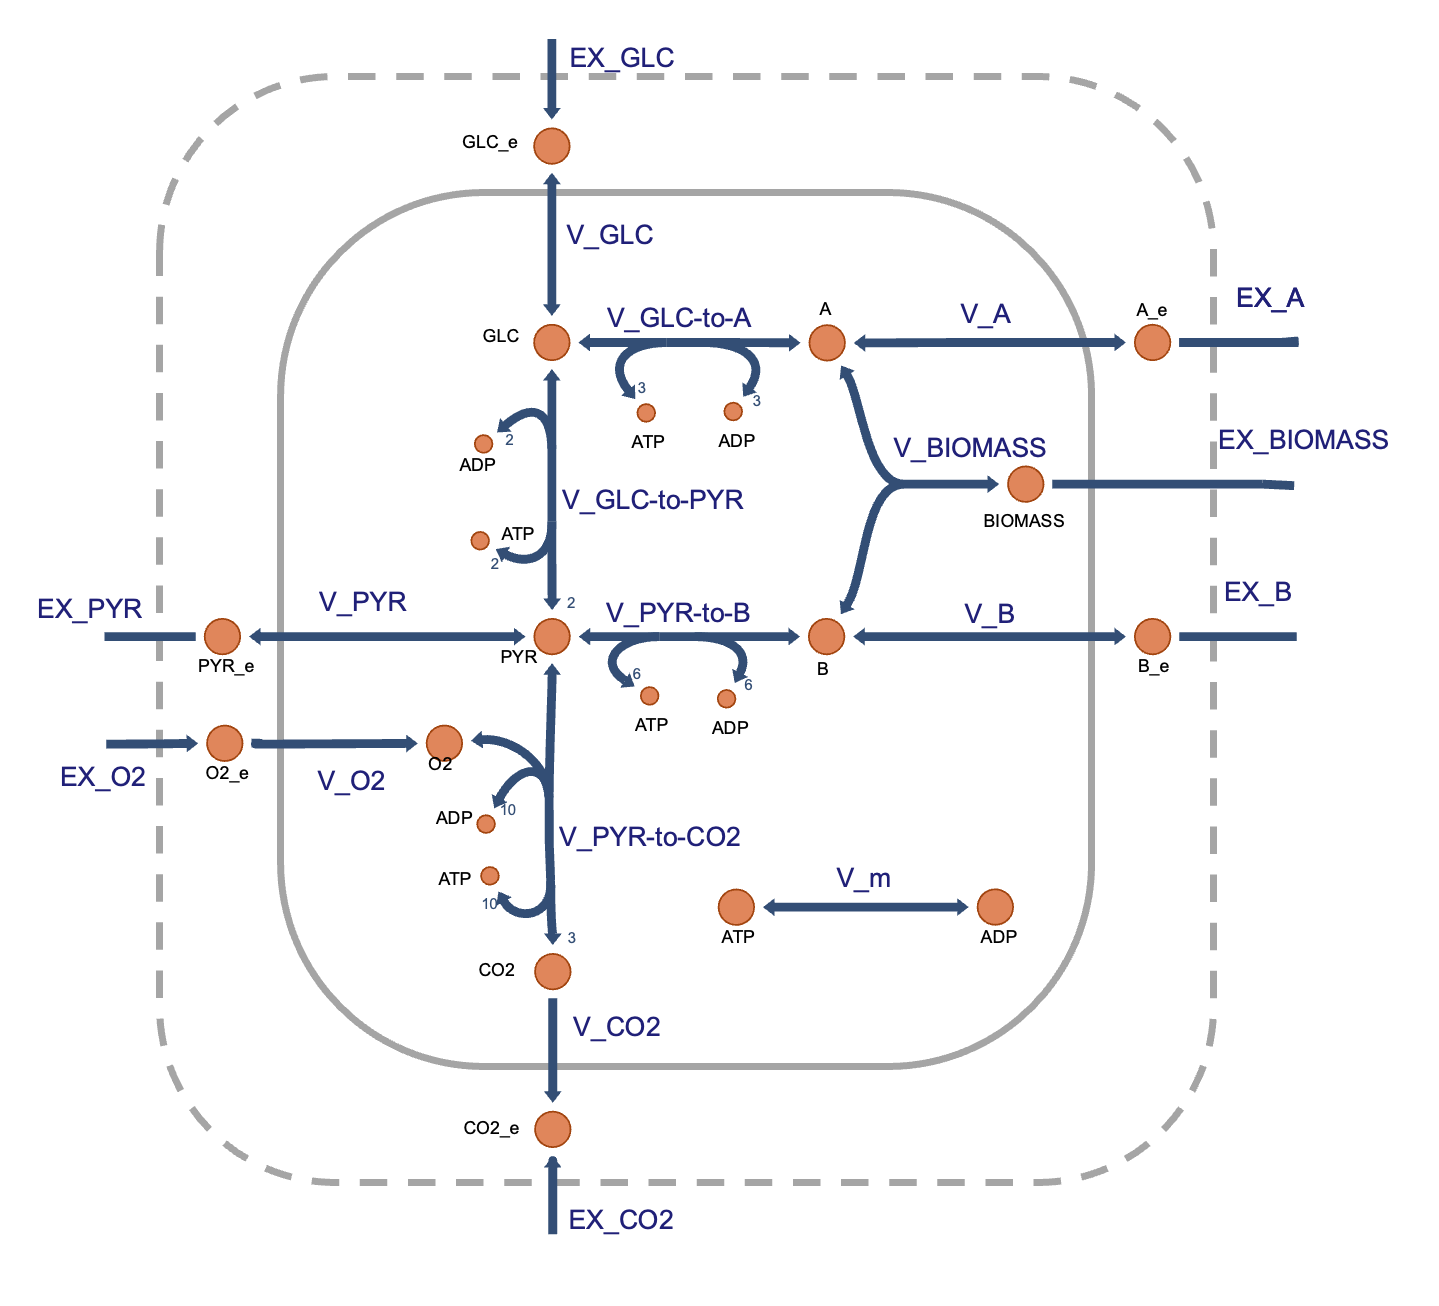

## Define Reaction Network

In [ ]:
# Define the reaction IDs
reacs = ['EX_GLC', 'EX_PYR', 'EX_O2', 'EX_CO2', 'EX_A', 'EX_B', 'EX_BIOMASS',
         'V_GLC', 'V_PYR', 'V_O2', 'V_CO2', 'V_A', 'V_B', 'V_GLC-to-A',
         'V_GLC-to-PYR', 'V_PYR-to-CO2', 'V_PYR-to-B', 'V_m', 'V_BIOMASS']
# Define the metabolite names
metabs = ['GLC', 'GLC_e', 'PYR', 'PYR_e', 'CO2', 'CO2_e', 'O2', 'O2_e', 'ATP',
          'ADP', 'A', 'A_e', 'B', 'B_e', 'BIOMASS']

# Define the stoichiometric matrix
# Each column corresponds to the reactions in the order they appear in `reacs`
# and each row correspond to the metabolites in the order they appear in `metabs`
S = np.array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,  -1.,  -1.,   0.,   0.,   0.,   0.],
              [ -1.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   2.,  -1.,  -1.,   0.,   0.],
              [  0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.],
              [  0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.],
              [  0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -3.,   2.,  10.,  -6.,  -1.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,  -2., -10.,   6.,   1.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   1.,   0.,   0.,   0.,   0.,  -1.],
              [  0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   1.,   0.,  -1.],
              [  0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
              [  0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]])

# Note that in this model (as is the convention) exchange reactions are defined
# with the substrate being transported as a reactant in the reaction, and
# with nothing as the product, i.e.
# glucose <=>
# This means that for the metabolite to enter the extracellular space, the flux
# of the reaction is negative, and a more negative flux means that more of the
# metabolite is entering the space. The lower bound of the reaction sets the
# minimum flux of the reaction (and thus the maxiumum flux of the metabolite
# entering the extracellular space).

STOICHIOMETRIC MATRIX


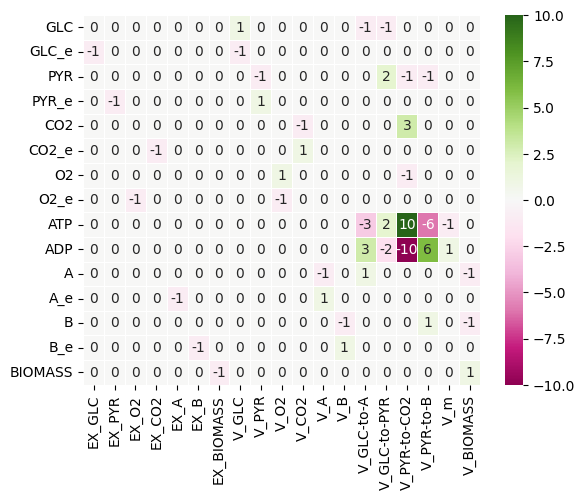

In [ ]:
# Visualize the S Matrix
print("STOICHIOMETRIC MATRIX")
colormap = sns.color_palette("Greens")
sns.heatmap(S, annot=True,  linewidths=.5, xticklabels=reacs,yticklabels=metabs,cmap="PiYG")
plt.yticks(rotation=0)
plt.show()

##Define optimization parameters

Define optimization parameters, i.e. flux lower bounds (LB) and upper bounds (UB), and objective function

In [ ]:
# Get the number of reactions and metabolites
m = len(metabs)
n = len(reacs)

b=np.zeros(m) # Right-hand side of SV=0

In [ ]:
# Define the lower and upper bounds
LARGE = 1000 # Large number to be used as "Infinite" for flux bounds
LB = np.zeros(n) # Set of lower bounds, initialize to zero
UB = LARGE*np.ones(n) # Set of upper bounds, initialize to LARGE

# Change the bounds for specific reactions
LB[reacs.index('EX_GLC')] = -10 # Reflects glucose limitation in the environment
LB[reacs.index('EX_O2')] = -20 # Reflects a typical maximum oxygen import flux in aerobic conditions
LB[reacs.index('V_m')] = 1 # Reflects ATP requirements to maintain the cell

# Combine LB, UB into set of pairs [LB,UB]
LBUB = np.transpose(np.stack((LB,UB), axis=0))

In [ ]:
# Initialize Objective function vector to all zeros
obj = np.zeros(n)
# Change only the coefficient of the biomass reaction
# Default of optimizer is "minimize", so a -1 will lead to maximization
obj[reacs.index('V_BIOMASS')] = -1
# Print the objective function vector
print("Objective function:", obj)

Objective function: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 -1.]


## Run LP to solve FBA

In [ ]:
solution = linprog(c=obj, A_eq=S, b_eq=b, bounds=LBUB, options={"disp": False}) # max c*v, given Sv=b, LB < v <UB

In [ ]:
print("Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties): ",solution.status)
print("Optimal value: ",solution.fun)
print("Solution vector: ", solution.x)

Optimization status (0:successful; 1:Iteration limit reached; 2:Infeasible; 3:Unbounded; 4:Numerical difficulties):  0
Optimal value:  -5.341463414634147
Solution vector:  [-10.          -0.          -3.97560976  11.92682927  -0.
  -0.           5.34146341  10.           0.           3.97560976
  11.92682927   0.           0.           5.34146341   4.65853659
   3.97560976   5.34146341   1.           5.34146341]


## Display Solution

Visualize Solution Vector

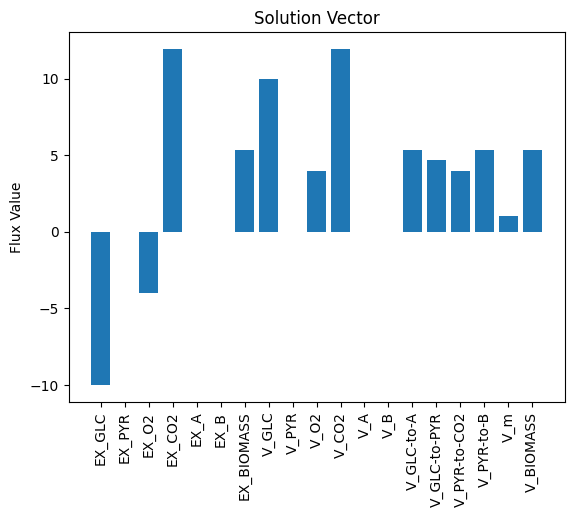

In [ ]:
v_pos = np.arange(n)
plt.bar(v_pos, solution.x, align='center')
plt.xticks(v_pos, reacs, rotation='vertical')
plt.ylabel('Flux Value')
plt.title('Solution Vector')
plt.show()